In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from stepwise_regression import step_reg
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, IsolationForest, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [188]:
df_bp = pd.read_excel('C:/X_bp.xlsx')
df_nup = pd.read_excel('C:/X_nup.xlsx')

In [189]:
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.index.rename('index', inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [191]:
df.describe(include='all').round(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0
mean,2.9,1975.7,739.9,110.6,22.2,285.9,482.7,73.3,2466.9,218.4,44.3,6.9,57.2
std,0.9,73.7,330.2,28.3,2.4,40.9,281.3,3.1,485.6,59.7,45.0,2.6,12.4
min,0.4,1731.8,2.4,17.7,14.3,100.0,0.6,64.1,1036.9,33.8,0.0,0.0,0.0
25%,2.3,1924.2,500.0,92.4,20.6,259.1,266.8,71.2,2135.9,179.6,0.0,5.1,49.8
50%,2.9,1977.6,739.7,110.6,22.2,285.9,451.9,73.3,2459.5,219.2,0.0,6.9,57.3
75%,3.6,2021.4,961.8,129.7,24.0,313.0,693.2,75.4,2767.2,257.5,90.0,8.6,64.9
max,5.6,2207.8,1911.5,199.0,33.0,413.3,1399.5,82.7,3848.4,414.6,90.0,14.4,104.0


### Рассматривается модуль упругости при растяжении

1 Переименование целевой переменной

In [192]:
df['y_1'] = df['Модуль упругости при растяжении, ГПа']
df = df.drop(columns=['Модуль упругости при растяжении, ГПа'])

2 Фильтрация шума с помощью маски (ядра) на основе исходного датасета (первые 23 строки)

In [193]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
cols = [col for col in df.columns]
df[cols] = sc.fit_transform(df[cols])

main_y = df.loc[:22, 'y_1']
other_y = df.loc[23:, 'y_1']
selected_rows = pd.DataFrame(columns=df.columns)

# Отбираем по knn ближайших соседей для каждого объекта базового датасета - первых 23 строк
knn = 3
for y in main_y:
    distances = euclidean_distances(df.iloc[23:], df.iloc[:23].loc[df['y_1'] == y])
    indices = np.argsort(distances, axis=0)[:knn]
    selected_rows = selected_rows.append(df.iloc[indices.flatten() + 23])
    
df = pd.concat([df.loc[:22], selected_rows]).drop_duplicates()

# Второй вариант кода фильтрации шума 
# selected_rows = []

# for x in range(23):
#     distances = euclidean_distances(df.iloc[x:x+1, :], df.iloc[23:, :]).flatten()
#     selected_rows.extend(list(distances.argsort()[:knn] + 23))

# df = df.loc[list(range(23)) + selected_rows].drop_duplicates()

df[cols] = sc.inverse_transform(df[cols])

print(df.shape)
df.sort_index()

(76, 13)


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,y_1
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,3000.000000,220.000000,0.0,4.000000,57.000000,70.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,3000.000000,220.000000,0.0,4.000000,60.000000,70.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,3000.000000,220.000000,0.0,4.000000,70.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,3000.000000,220.000000,0.0,5.000000,47.000000,70.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,3000.000000,220.000000,0.0,5.000000,57.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2.807028,2029.296906,993.859728,74.690667,27.292550,226.555876,547.516759,2528.082238,220.732220,90.0,0.037639,59.156843,71.680994
964,2.695937,1993.544328,402.032452,131.532947,25.275127,338.463813,819.961314,2120.968913,311.066777,90.0,7.410758,50.568878,74.977723
991,1.951224,1992.644115,661.574467,114.162319,23.091374,273.535419,833.694774,2518.310162,187.671301,90.0,3.608573,46.009743,73.623395
1004,1.580433,2038.289409,767.897075,83.191553,25.627620,249.612303,774.578473,2768.839085,266.956745,90.0,2.751101,63.681745,71.279418


In [194]:
print(sorted(df.index.tolist()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 28, 61, 75, 130, 159, 178, 192, 207, 224, 234, 235, 239, 247, 248, 253, 267, 283, 301, 305, 322, 324, 336, 343, 358, 364, 365, 389, 409, 418, 442, 452, 461, 490, 498, 519, 583, 587, 669, 675, 694, 710, 733, 757, 819, 824, 849, 861, 912, 936, 964, 991, 1004, 1007]


3 EDA

3.1 Визуализация данных

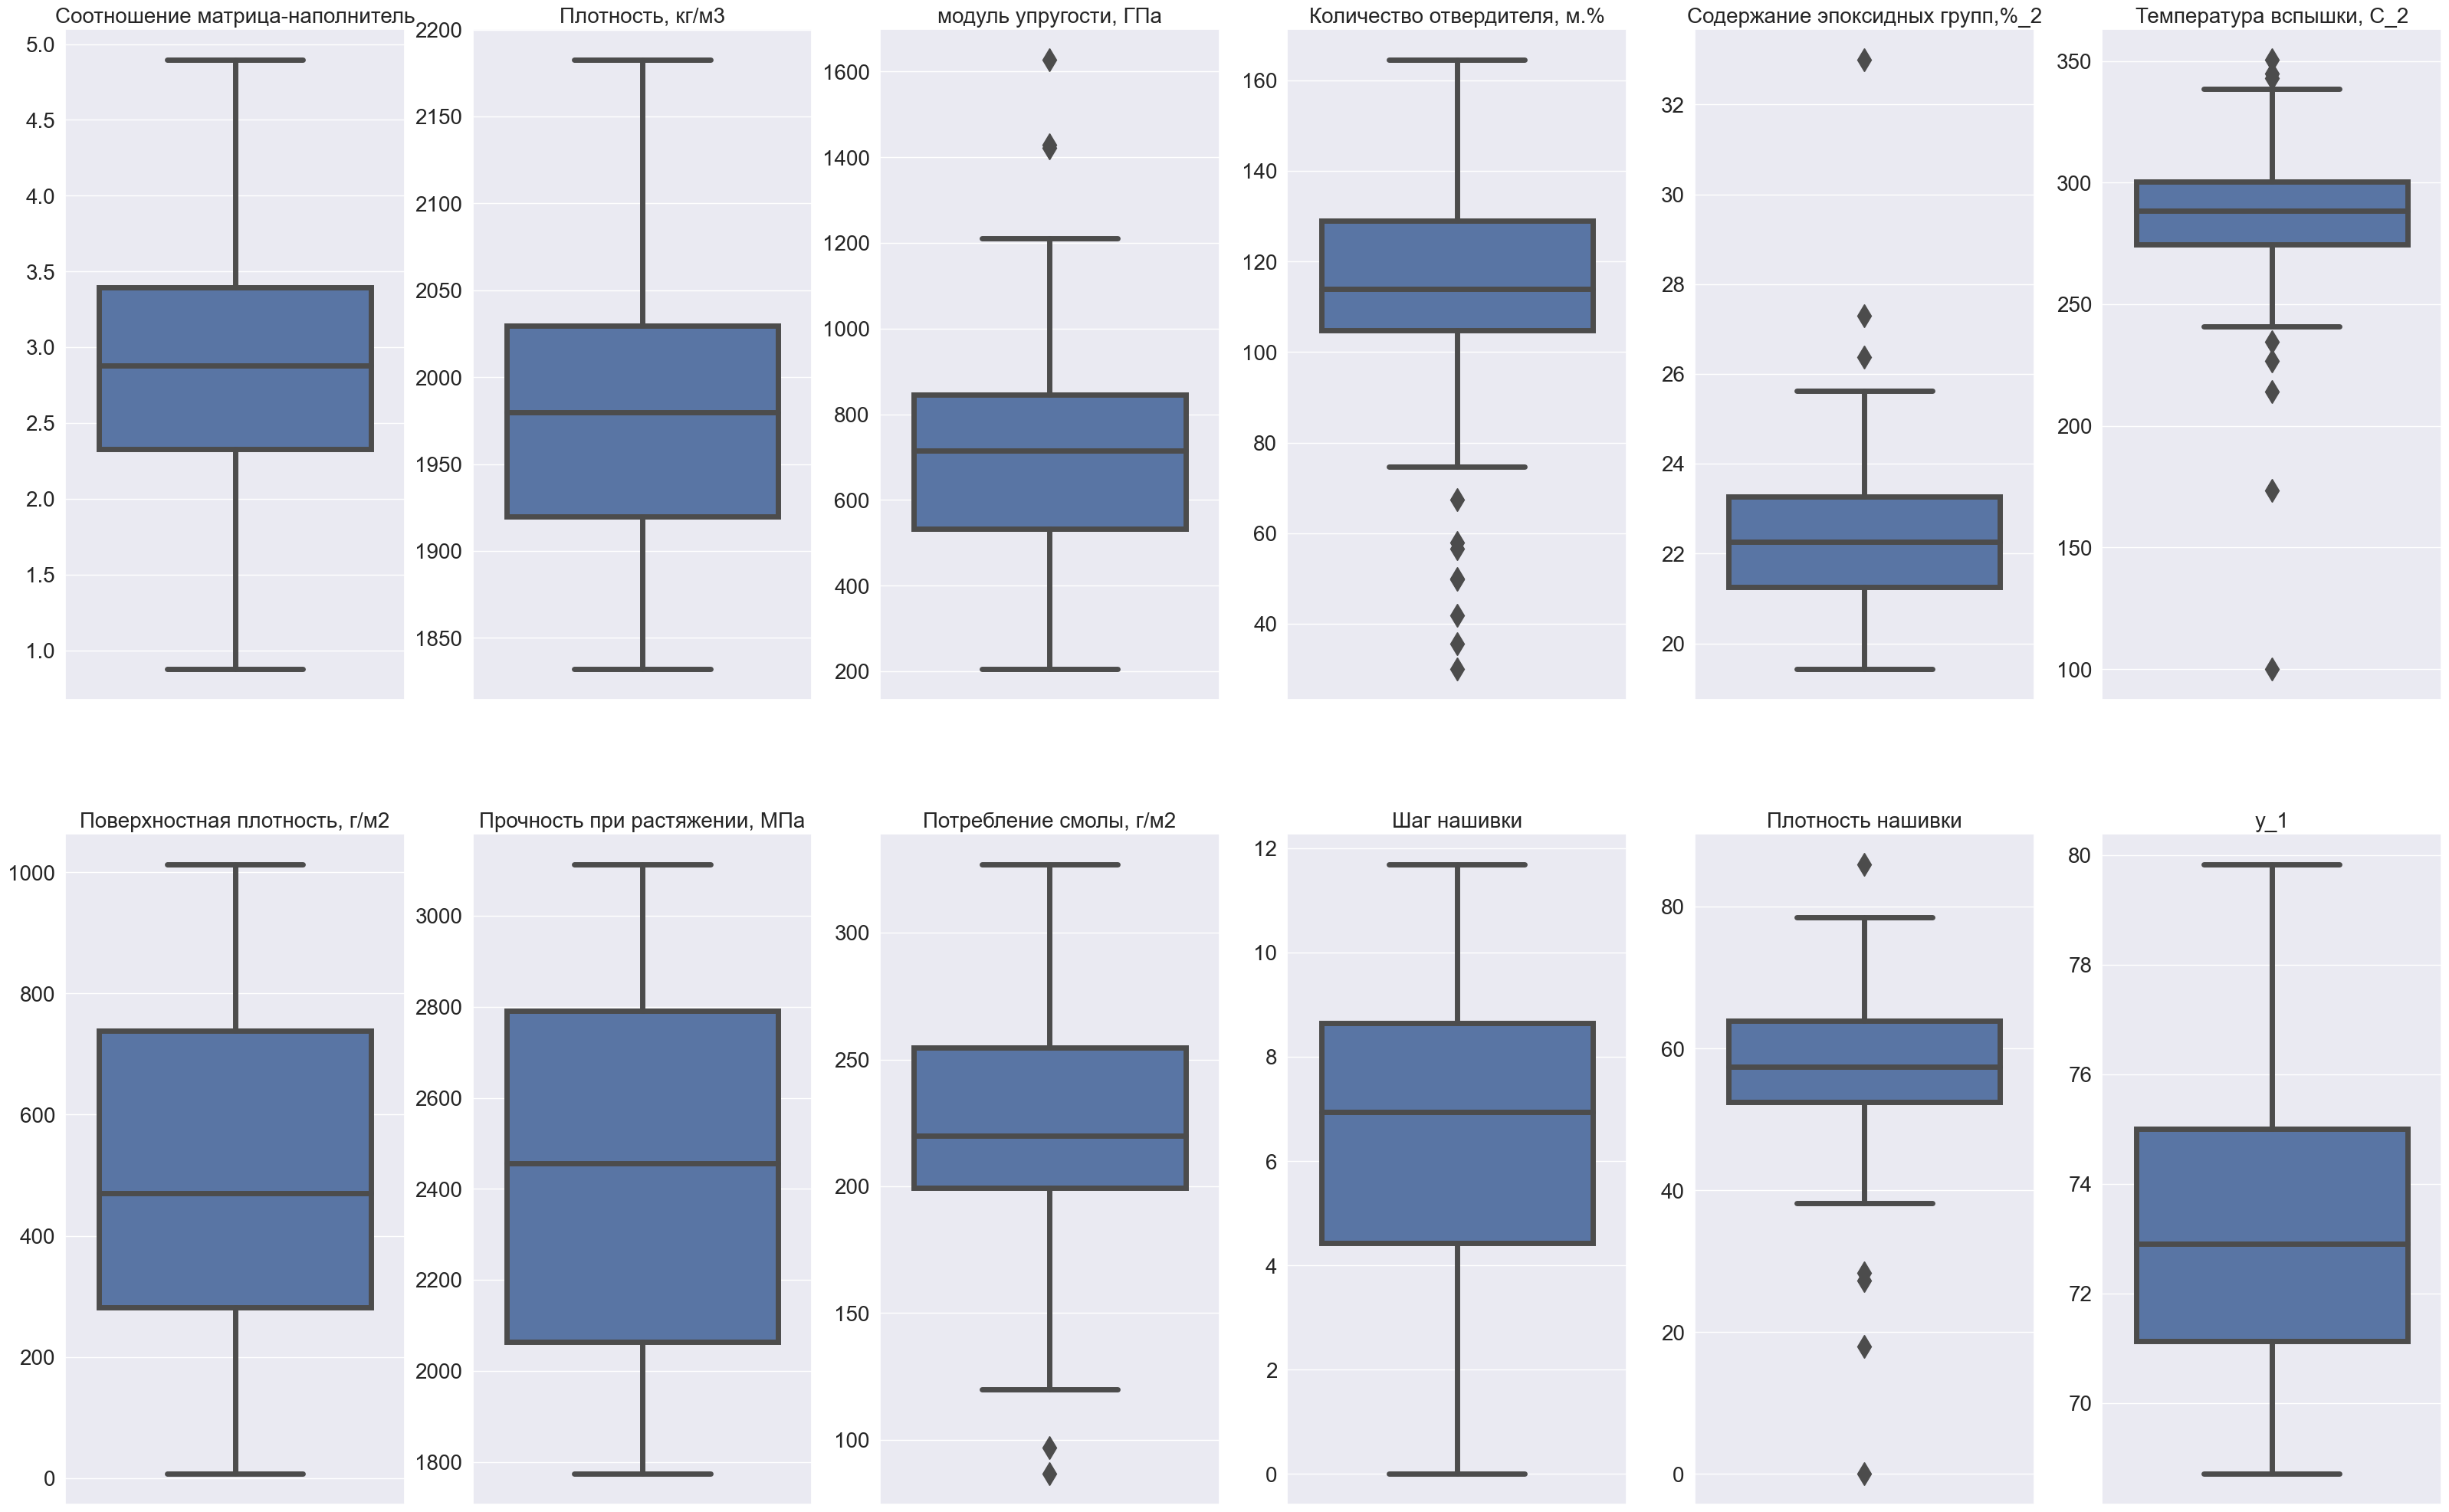

In [195]:
plt.figure(figsize=(40, 25))

for i, col in enumerate(df.drop('Угол нашивки, град', axis=1), start=1):
    plt.subplot(2, 6, i)
    sns.boxplot(data=df, y=col, fliersize=15, linewidth=5)
    # plt.setp(plt.gca().get_xticklabels(), fontsize=8)
    plt.setp(plt.gca().get_yticklabels(), fontsize=20)
    plt.title(col, size=20)
    plt.ylabel(None)

In [196]:
# sns.pairplot(df, kind="reg")
# plt.show()

3.2 Приведение к нормальному распределению (методом Йео-Джонсона)

In [197]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
columns_to_transform = df.columns.difference(['y_1', 'Угол нашивки, град'])
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

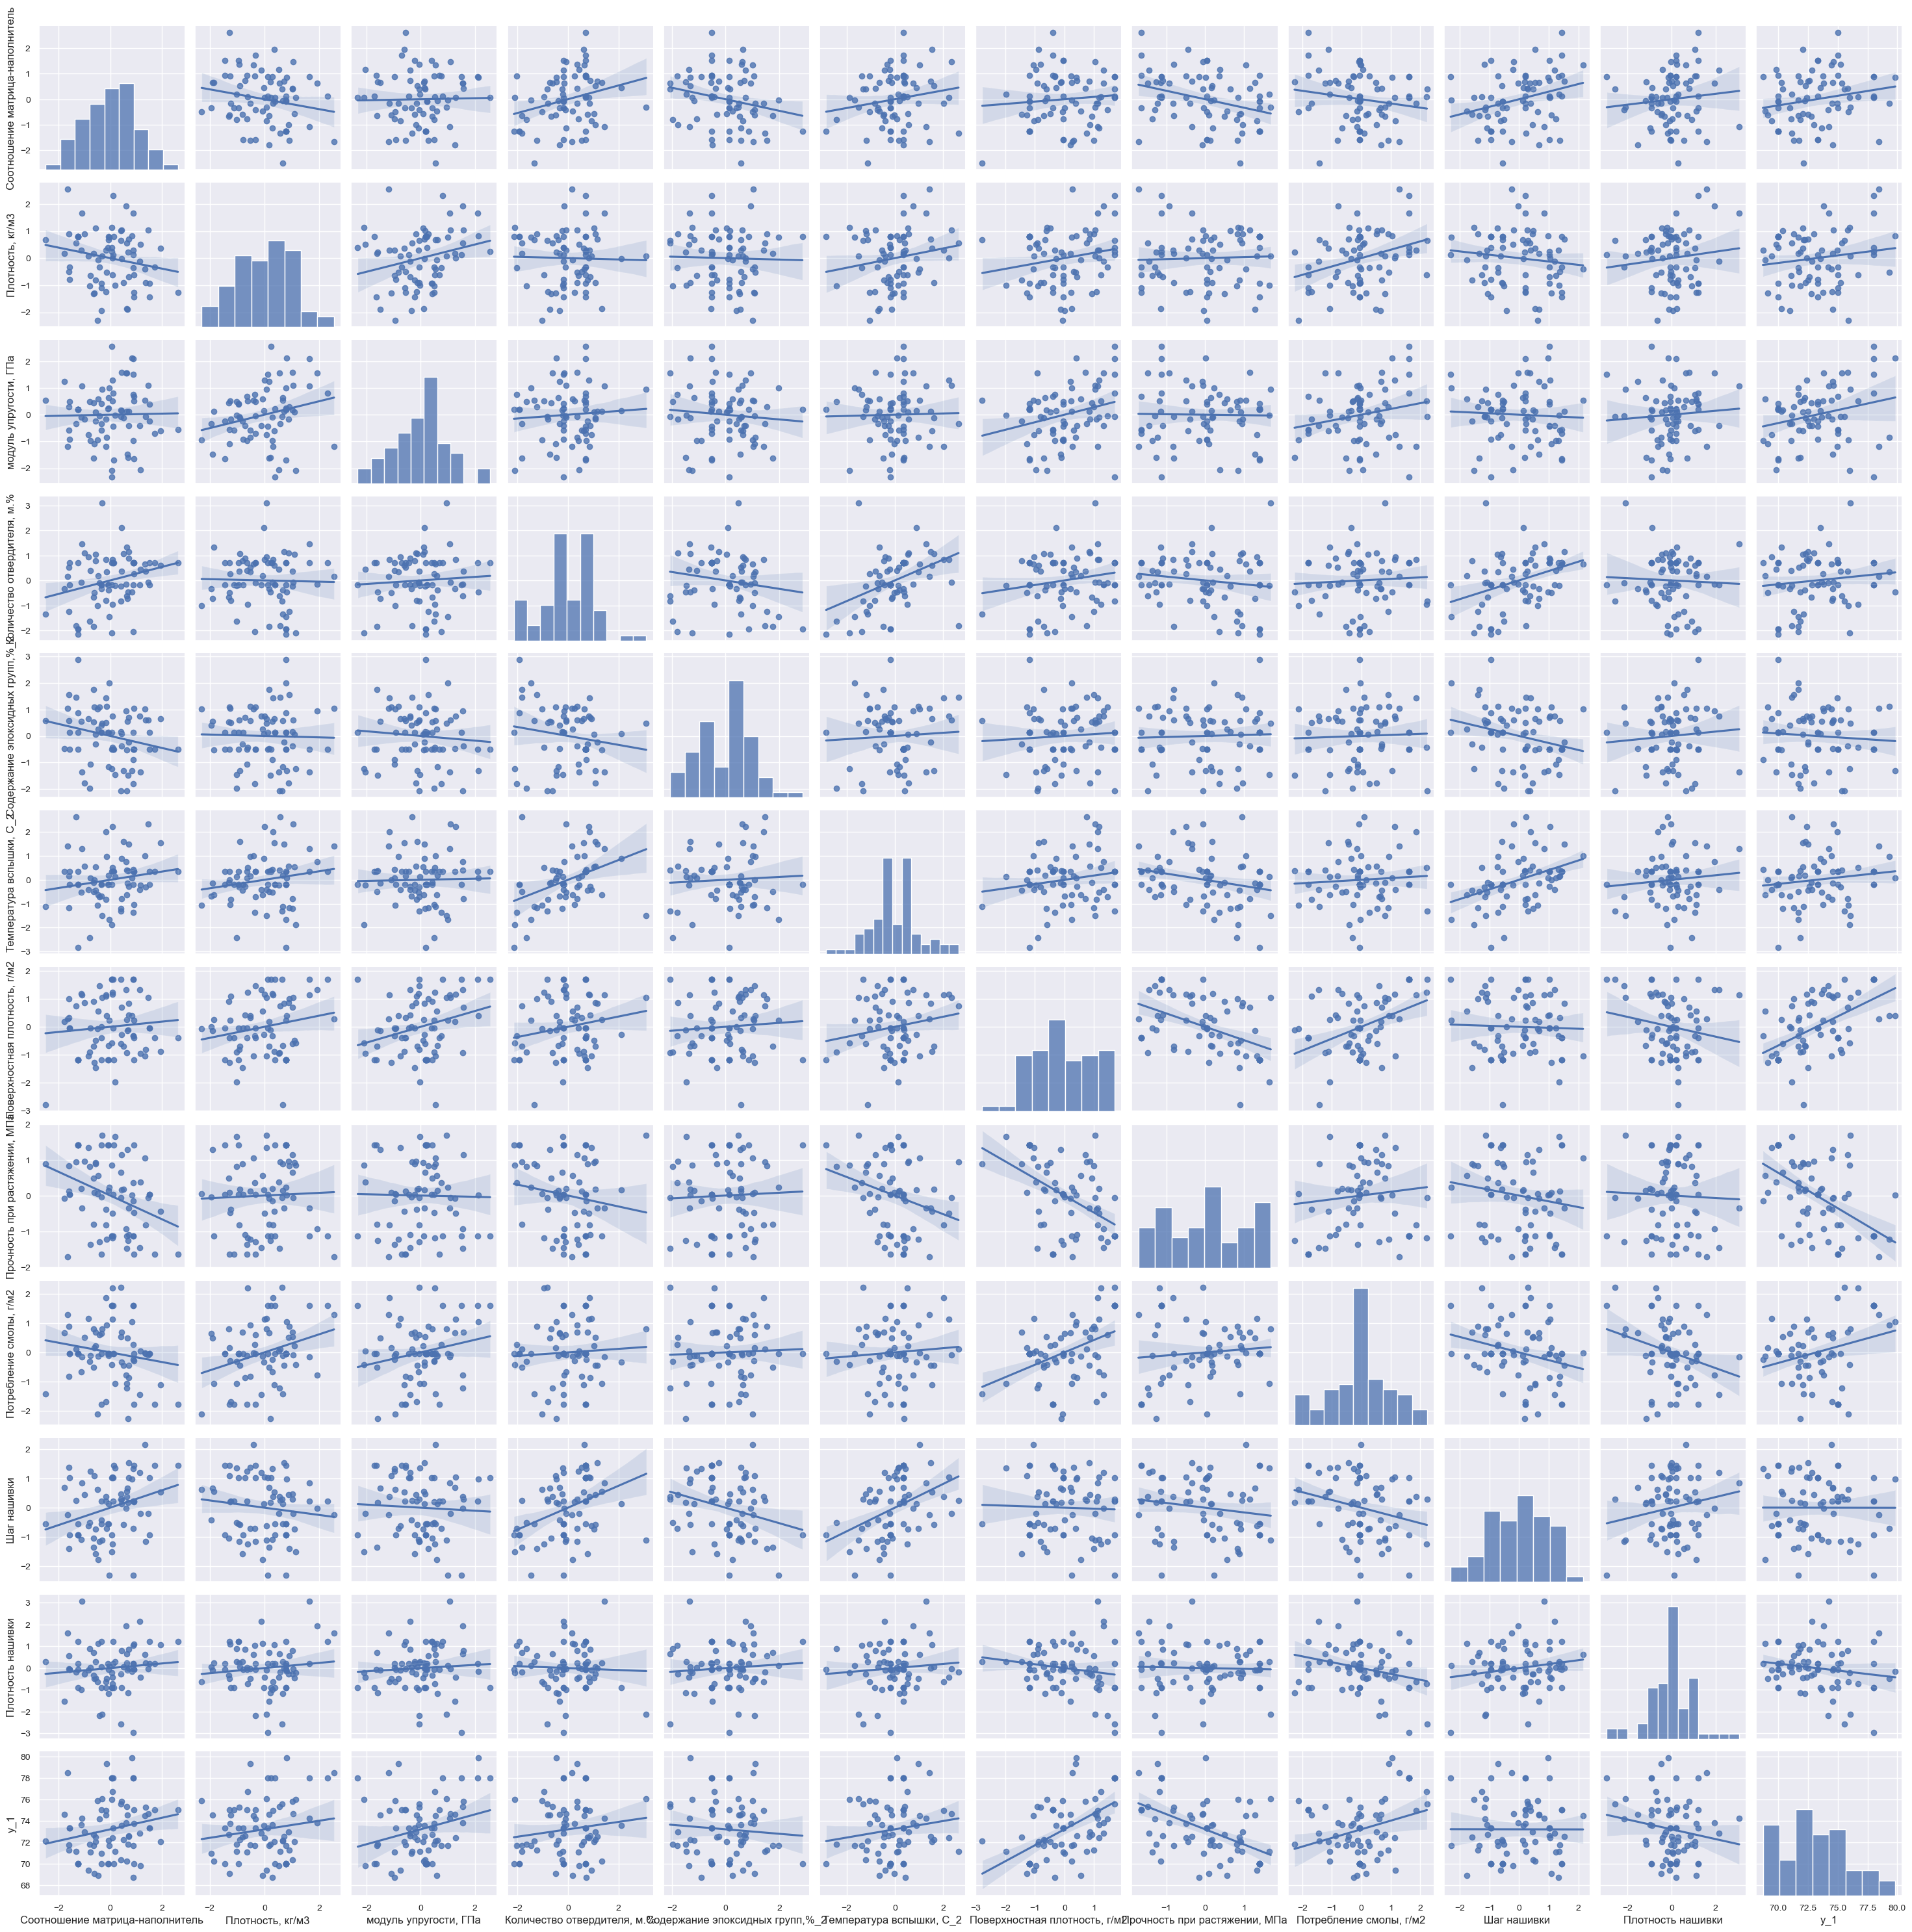

In [198]:
sns.pairplot(df.drop('Угол нашивки, град', axis=1), kind="reg")
plt.show()

4 Отбор признаков

In [199]:
x_0 = 'Соотношение матрица-наполнитель'
x_1 = 'Плотность, кг/м3'
x_2 = 'модуль упругости, ГПа'
x_3 = 'Количество отвердителя, м.%'
x_4 = 'Содержание эпоксидных групп,%_2'
x_5 = 'Температура вспышки, С_2'
x_6 = 'Поверхностная плотность, г/м2'
x_7 = 'Модуль упругости при растяжении, ГПа'
x_8 = 'Прочность при растяжении, МПа'
x_9 = 'Потребление смолы, г/м2'
x_10 = 'Угол нашивки, град'
x_11 = 'Шаг нашивки'
x_12 = 'Плотность нашивки'

4.1 Корреляционные матрицы

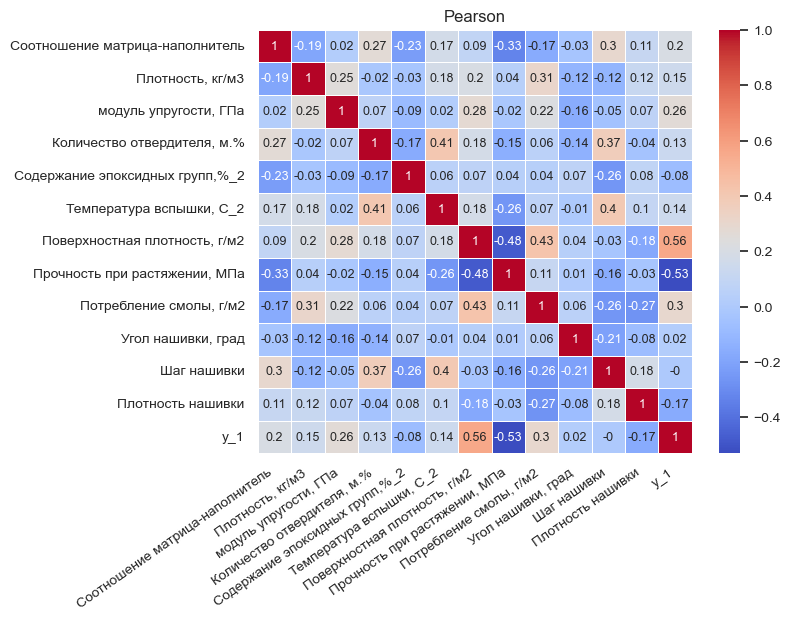

In [200]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

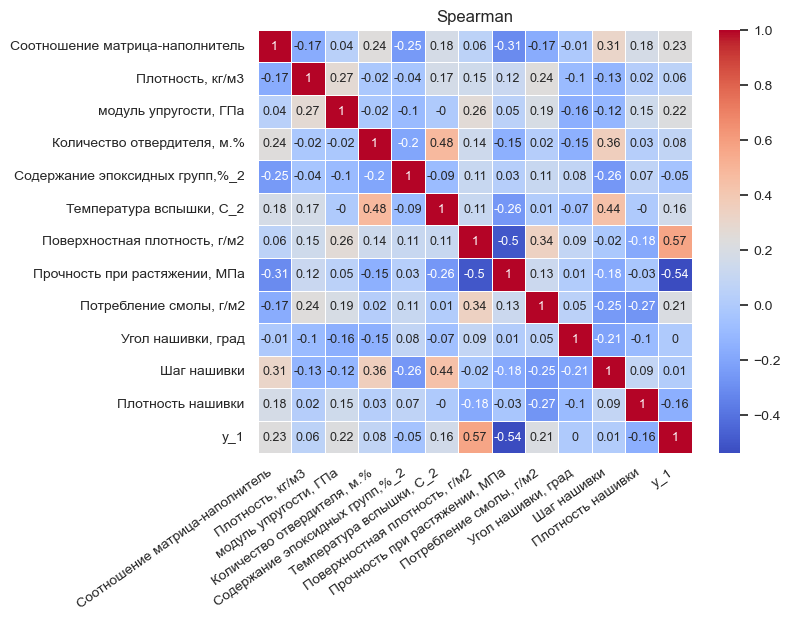

In [201]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='spearman').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Spearman')
plt.show()

4.2 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции:  $R^2 = 1 - \frac{detA^+}{detA}$

In [202]:
corr_matrix_p = df.corr(method='pearson')
corr_matrix_s = df.corr(method='spearman')
# коэффициенты корреляции между y и x
corr_yx_p = corr_matrix_p['y_1'][:-1]
corr_yx_s = corr_matrix_s['y_1'][:-1]
# коэффициенты парной корреляции между x
corr_x_p = np.delete(np.array(corr_matrix_p), -1, axis=0)[:, :-1]
corr_x_s = np.delete(np.array(corr_matrix_s), -1, axis=0)[:, :-1]

det_r_yx_p = np.linalg.det(corr_matrix_p)
det_r_x_p = np.linalg.det(corr_matrix_p.iloc[:-1, :-1])
R2_P = 1 - det_r_yx_p / det_r_x_p

det_r_yx_s = np.linalg.det(corr_matrix_s)
det_r_x_s = np.linalg.det(corr_matrix_s.iloc[:-1, :-1])
R2_S = 1 - det_r_yx_s / det_r_x_s
print()
print(f"Прогноз коэф. детерминации R2 Pearson:  {R2_P.round(3)}")
print(f"Прогноз коэф. детерминации R2 Spearman: {R2_S.round(3)}")


Прогноз коэф. детерминации R2 Pearson:  0.485
Прогноз коэф. детерминации R2 Spearman: 0.479


In [203]:
X_1 = df.copy()
y_1 = X_1.pop('y_1')

4.3 Анализ значимости признаков

MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [204]:
mi_full = mutual_info_regression(X_1, y_1, random_state=2023)
f_full = f_regression(X_1, y_1)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X_1.corrwith(y_1), 'f':f_full[0], 'p':f_full[1]}, index=X_1.columns)
f_p_full.round(3)

,MI,corr,f,p
Соотношение матрица-наполнитель,0.039,0.201,3.116,0.082
"Плотность, кг/м3",0.139,0.149,1.679,0.199
"модуль упругости, ГПа",0.244,0.260,5.358,0.023
"Количество отвердителя, м.%",0.190,0.129,1.260,0.265
"Содержание эпоксидных групп,%_2",0.164,-0.078,0.455,0.502
"Температура вспышки, С_2",0.090,0.144,1.572,0.214
"Поверхностная плотность, г/м2",0.835,0.557,33.216,0.000
"Прочность при растяжении, МПа",0.754,-0.529,28.763,0.000
"Потребление смолы, г/м2",0.680,0.302,7.404,0.008
"Угол нашивки, град",0.000,0.020,0.030,0.862


4.4 Анализ мультиколлинеарности признаков

In [205]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df, features = df.columns)

,VIF,Tolerance
Соотношение матрица-наполнитель,1.362387,0.734006
"Плотность, кг/м3",1.403703,0.712401
"модуль упругости, ГПа",1.279300,0.781677
"Количество отвердителя, м.%",1.434291,0.697208
"Содержание эпоксидных групп,%_2",1.282073,0.779987
"Температура вспышки, С_2",1.654552,0.604393
"Поверхностная плотность, г/м2",2.158959,0.463186
"Прочность при растяжении, МПа",2.141076,0.467055
"Потребление смолы, г/м2",1.777480,0.562594
"Угол нашивки, град",1.140291,0.876969


4.5 Пошаговый отбор признаков (stepwise regression)

In [206]:
backselect = step_reg.backward_regression(X_1, y_1, 0.05, verbose=False)
forwardselect = step_reg.forward_regression(X_1, y_1, 0.05, verbose=False)
print(backselect)
print(forwardselect)

['Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2']
['Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2']


#### В результате пошагового отбора рассматриваем следующие признаки:

In [207]:
df = df.loc[:, [x_0, x_1, x_2, x_3, x_5, x_6, x_8, x_9, x_12, 'y_1']]

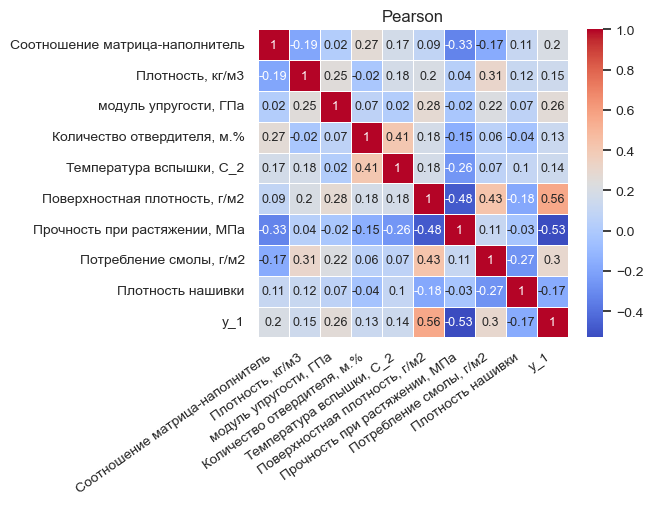

In [208]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5 Разделение датасета на train и test, масштабирование

In [209]:
X_1 = df.drop(['y_1'], axis=1)

6 Функция разделения датасета на train и test с масштабированием

In [210]:
def train_test(rand_st):
    X_train, X_test, y_train, y_test = train_test_split(X_1,
                                                    y_1,
                                                    test_size=0.3,
                                                    random_state=rand_st)
    sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
    X_train_std = sc.fit_transform(X_train) 
    X_test_std = sc.transform(X_test)
    return X_train_std, X_test_std, y_train, y_test

#### 7 Обучение моделей

In [211]:
metrics = {}

7.1 LinearRegression

In [212]:
rand_states = [115528] + list(range(750071, 750081))

best_rand_st = rand_states[0]
best_r2 = -np.inf
best_model_lr = None

for rand_st in rand_states:
    print(f'random_state = {rand_st}')

    X_train_std = train_test(rand_st)[0]
    X_test_std = train_test(rand_st)[1]
    y_train = train_test(rand_st)[2]
    y_test = train_test(rand_st)[3]
    
    lr = LinearRegression()
    model_lr = lr.fit(X_train_std, y_train)
    y_lr_pred = model_lr.predict(X_test_std)
    y_lr_pred_train = model_lr.predict(X_train_std)
    
    r2_lr = r2_score(y_test, y_lr_pred)
    r2_lr_train = r2_score(y_train, y_lr_pred_train)
    print(f'r2: {r2_lr.round(3)}')

    if r2_lr > best_r2:
        best_r2 = r2_lr
        best_model_lr = model_lr
        best_rand_st = rand_st
        best_X_train_std = X_train_std
        best_X_test_std = X_test_std
        best_y_train = y_train
        best_y_test = y_test
print('Лучшее значение коэф. детерминации R2:',   best_r2.round(3))

random_state = 115528
r2: 0.855
random_state = 750071
r2: 0.313
random_state = 750072
r2: 0.41
random_state = 750073
r2: 0.189
random_state = 750074
r2: 0.014
random_state = 750075
r2: 0.329
random_state = 750076
r2: 0.372
random_state = 750077
r2: -0.177
random_state = 750078
r2: 0.23
random_state = 750079
r2: 0.085
random_state = 750080
r2: -0.732
Лучшее значение коэф. детерминации R2: 0.855


In [213]:
y_lr_pred = best_model_lr.predict(best_X_test_std)
y_lr_pred_train = best_model_lr.predict(best_X_train_std)

rmse_lr_train = np.sqrt(mean_squared_error(best_y_train, y_lr_pred_train)).round(3)
rmse_lr_test = np.sqrt(mean_squared_error(best_y_test, y_lr_pred)).round(3)
mae_lr_train = mean_absolute_error(best_y_train, y_lr_pred_train).round(3)
mae_lr_test = mean_absolute_error(best_y_test, y_lr_pred).round(3)
r2_lr_train = r2_score(best_y_train, y_lr_pred_train).round(3)
r2_lr_test = r2_score(best_y_test, y_lr_pred).round(3)
metrics['LinearRegression'] = (best_rand_st, rmse_lr_train, rmse_lr_test, mae_lr_train, mae_lr_test, r2_lr_train, r2_lr_test)

print('Значение random_state для лучшей модели:', best_rand_st)
print()
print(f'RMSE train: {rmse_lr_train}')
print(f'RMSE test:  {rmse_lr_test}')
print()
print(f'MAE train:  {mae_lr_train}')
print(f'MAE test:   {mae_lr_test}')
print()
print(f'R2 train:   {r2_lr_train}')
print(f'R2 test:    {r2_lr_test}')
print()
print('Коэффициенты регрессии:')
print(pd.DataFrame(best_model_lr.coef_[:], index=X_1.columns, columns=['k']).round(5))
print()
print(f'Свободный член регрессии  a0 =  {best_model_lr.intercept_.round(3)}')

Значение random_state для лучшей модели: 115528

RMSE train: 2.249
RMSE test:  0.871

MAE train:  1.897
MAE test:   0.723

R2 train:   0.363
R2 test:    0.855

Коэффициенты регрессии:
                                       k
Соотношение матрица-наполнитель  0.28518
Плотность, кг/м3                 0.42031
модуль упругости, ГПа            0.54926
Количество отвердителя, м.%     -0.16945
Температура вспышки, С_2        -0.10324
Поверхностная плотность, г/м2    0.68563
Прочность при растяжении, МПа   -2.09849
Потребление смолы, г/м2          0.63048
Плотность нашивки               -0.26623

Свободный член регрессии  a0 =  73.231


7.2 ElasticNet

In [214]:
rand_states = [49095] + list(range(51071, 51081))

best_rand_st = rand_states[0]
best_r2 = -np.inf
best_model_en = None

for rand_st in rand_states:
    print(f'random_state = {rand_st}')

    X_train_std = train_test(rand_st)[0]
    X_test_std = train_test(rand_st)[1]
    y_train = train_test(rand_st)[2]
    y_test = train_test(rand_st)[3]
    
    en = ElasticNet()
    en_parameters = {'alpha': (0.01, 0.03, 0.1, 0.3, 1, 3, 10), 
                 'l1_ratio': (0.05, 0.1, 0.3, 0.5, 0.7, 0.9),
                 'random_state':[1, 7, 42, 100]
    }
    model_en = GridSearchCV(estimator=en,
                   param_grid=en_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
    model_en.fit(X_train_std, y_train)

    y_en_pred = model_en.predict(X_test_std)
    y_en_pred_train = model_en.predict(X_train_std)
    
    r2_en = r2_score(y_test, y_en_pred)
    r2_en_train = r2_score(y_train, y_en_pred_train)
    print(f'r2: {r2_en.round(3)}')

    if r2_en > best_r2:
        best_r2 = r2_en
        best_model_en = model_en
        best_rand_st = rand_st
        best_X_train_std = X_train_std
        best_X_test_std = X_test_std
        best_y_train = y_train
        best_y_test = y_test
print('Лучшее значение коэф. детерминации R2:',   best_r2.round(3))

random_state = 49095
r2: 0.727
random_state = 51071
r2: 0.347
random_state = 51072
r2: 0.354
random_state = 51073
r2: 0.225
random_state = 51074
r2: 0.288
random_state = 51075
r2: 0.138
random_state = 51076
r2: 0.173
random_state = 51077
r2: 0.339
random_state = 51078
r2: 0.308
random_state = 51079
r2: -0.231
random_state = 51080
r2: -0.067
Лучшее значение коэф. детерминации R2: 0.727


In [215]:
y_en_pred = best_model_en.predict(best_X_test_std)
y_en_pred_train = best_model_en.predict(best_X_train_std)

rmse_en_train = np.sqrt(mean_squared_error(best_y_train, y_en_pred_train)).round(3)
rmse_en_test = np.sqrt(mean_squared_error(best_y_test, y_en_pred)).round(3)
mae_en_train = mean_absolute_error(best_y_train, y_en_pred_train).round(3)
mae_en_test = mean_absolute_error(best_y_test, y_en_pred).round(3)
r2_en_train = r2_score(best_y_train, y_en_pred_train).round(3)
r2_en_test = r2_score(best_y_test, y_en_pred).round(3)
metrics['ElasticNet'] = (best_rand_st, rmse_en_train, rmse_en_test, mae_en_train, mae_en_test, r2_en_train, r2_en_test)

print('Значение random_state для лучшей модели:', best_rand_st)
print()
print(f'RMSE train: {rmse_en_train}')
print(f'RMSE test:  {rmse_en_test}')
print()
print(f'MAE train:  {mae_en_train}')
print(f'MAE test:   {mae_en_test}')
print()
print(f'R2 train:   {r2_en_train}')
print(f'R2 test:    {r2_en_test}')
model_en.best_params_

Значение random_state для лучшей модели: 49095

RMSE train: 2.201
RMSE test:  1.269

MAE train:  1.782
MAE test:   1.033

R2 train:   0.366
R2 test:    0.727


{'alpha': 1, 'l1_ratio': 0.05, 'random_state': 1}

7.3 GradientBoostingRegressor

In [216]:
rand_states = [1634] + list(range(2501, 2511))

best_rand_st = rand_states[0]
best_r2 = -np.inf
best_model_gbr = None

for rand_st in rand_states:
    print(f'random_state = {rand_st}')

    X_train_std = train_test(rand_st)[0]
    X_test_std = train_test(rand_st)[1]
    y_train = train_test(rand_st)[2]
    y_test = train_test(rand_st)[3]
    
    gbr = GradientBoostingRegressor()
    gbr_parameters = {
'n_estimators' : range(100, 400, 100),
                    'criterion' : ['friedman_mse', 'squared_error'],
                    'max_depth' : range(2, 4),
                    'min_samples_leaf' : range(2, 4),
                    'min_samples_split' : range(3, 6, 2),
                    'random_state':[1147, 7, 42, 100]
    }
    model_gbr = GridSearchCV(estimator=gbr,
                   param_grid=gbr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
    model_gbr.fit(X_train_std, y_train)

    y_gbr_pred = model_gbr.predict(X_test_std)
    y_gbr_pred_train = model_gbr.predict(X_train_std)
    
    r2_gbr = r2_score(y_test, y_gbr_pred)
    r2_gbr_train = r2_score(y_train, y_gbr_pred_train)
    print(f'r2: {r2_gbr.round(3)}')

    if r2_gbr > best_r2:
        best_r2 = r2_gbr
        best_model_gbr = model_gbr
        best_rand_st = rand_st
        best_X_train_std = X_train_std
        best_X_test_std = X_test_std
        best_y_train = y_train
        best_y_test = y_test
print('Лучшее значение коэф. детерминации R2:',   best_r2.round(3))

random_state = 1634
r2: 0.727
random_state = 2501
r2: 0.119
random_state = 2502
r2: -0.049
random_state = 2503
r2: 0.254
random_state = 2504
r2: -0.219
random_state = 2505
r2: 0.213
random_state = 2506
r2: 0.411
random_state = 2507
r2: 0.395
random_state = 2508
r2: 0.073
random_state = 2509
r2: -0.747
random_state = 2510
r2: 0.214
Лучшее значение коэф. детерминации R2: 0.727


In [217]:
y_gbr_pred = best_model_gbr.predict(best_X_test_std)
y_gbr_pred_train = best_model_gbr.predict(best_X_train_std)

rmse_gbr_train = np.sqrt(mean_squared_error(best_y_train, y_gbr_pred_train)).round(3)
rmse_gbr_test = np.sqrt(mean_squared_error(best_y_test, y_gbr_pred)).round(3)
mae_gbr_train = mean_absolute_error(best_y_train, y_gbr_pred_train).round(3)
mae_gbr_test = mean_absolute_error(best_y_test, y_gbr_pred).round(3)
r2_gbr_train = r2_score(best_y_train, y_gbr_pred_train).round(3)
r2_gbr_test = r2_score(best_y_test, y_gbr_pred).round(3)
metrics['GradientBoosting'] = (best_rand_st, rmse_gbr_train, rmse_gbr_test, mae_gbr_train, mae_gbr_test, r2_gbr_train, r2_gbr_test)

print('Значение random_state для лучшей модели:', best_rand_st)
print()
print(f'RMSE train: {rmse_gbr_train}')
print(f'RMSE test:  {rmse_gbr_test}')
print()
print(f'MAE train:  {mae_gbr_train}')
print(f'MAE test:   {mae_gbr_test}')
print()
print(f'R2 train:   {r2_gbr_train}')
print(f'R2 test:    {r2_gbr_test}')
model_gbr.best_params_

Значение random_state для лучшей модели: 1634

RMSE train: 0.083
RMSE test:  1.318

MAE train:  0.064
MAE test:   0.939

R2 train:   0.999
R2 test:    0.727


{'criterion': 'friedman_mse',
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100,
 'random_state': 1147}

7.4 RandomForestRegressor

In [218]:
rand_states = [24549] + list(range(15, 19))

best_rand_st = rand_states[0]
best_r2 = -np.inf
best_model_rfr = None

for rand_st in rand_states:
    print(f'random_state = {rand_st}')

    X_train_std = train_test(rand_st)[0]
    X_test_std = train_test(rand_st)[1]
    y_train = train_test(rand_st)[2]
    y_test = train_test(rand_st)[3]
    
    rfr = RandomForestRegressor()
    rfr_parameters = {
                    'n_estimators' : range(100, 400, 100),
                    'criterion' : ['squared_error', 'absolute_error'],
                    'max_depth' : range(1, 8),
                    'min_samples_leaf' : range(2, 4),
                    'min_samples_split' : range(4, 8, 2),
                    'random_state':[1, 7, 42, 1147]
    }
    model_rfr = GridSearchCV(estimator=rfr,
                   param_grid=rfr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
    model_rfr.fit(X_train_std, y_train)

    y_rfr_pred = model_rfr.predict(X_test_std)
    y_rfr_pred_train = model_rfr.predict(X_train_std)
    
    r2_rfr = r2_score(y_test, y_rfr_pred)
    r2_rfr_train = r2_score(y_train, y_rfr_pred_train)
    print(f'r2: {r2_rfr.round(3)}')

    if r2_rfr > best_r2:
        best_r2 = r2_rfr
        best_model_rfr = model_rfr
        best_rand_st = rand_st
        best_X_train_std = X_train_std
        best_X_test_std = X_test_std
        best_y_train = y_train
        best_y_test = y_test
print('Лучшее значение коэф. детерминации R2:',   best_r2.round(3))

random_state = 24549
r2: 0.839
random_state = 15
r2: 0.384
random_state = 16
r2: -0.012
random_state = 17
r2: 0.402
random_state = 18
r2: 0.14
Лучшее значение коэф. детерминации R2: 0.839


In [219]:
y_rfr_pred = best_model_rfr.predict(best_X_test_std)
y_rfr_pred_train = best_model_rfr.predict(best_X_train_std)

rmse_rfr_train = np.sqrt(mean_squared_error(best_y_train, y_rfr_pred_train)).round(3)
rmse_rfr_test = np.sqrt(mean_squared_error(best_y_test, y_rfr_pred)).round(3)
mae_rfr_train = mean_absolute_error(best_y_train, y_rfr_pred_train).round(3)
mae_rfr_test = mean_absolute_error(best_y_test, y_rfr_pred).round(3)
r2_rfr_train = r2_score(best_y_train, y_rfr_pred_train).round(3)
r2_rfr_test = r2_score(best_y_test, y_rfr_pred).round(3)
metrics['RandomForest'] = (best_rand_st, rmse_rfr_train, rmse_rfr_test, mae_rfr_train, mae_rfr_test, r2_rfr_train, r2_rfr_test)

print('Значение random_state для лучшей модели:', best_rand_st)
print()
print(f'RMSE train: {rmse_rfr_train}')
print(f'RMSE test:  {rmse_rfr_test}')
print()
print(f'MAE train:  {mae_rfr_train}')
print(f'MAE test:   {mae_rfr_test}')
print()
print(f'R2 train:   {r2_rfr_train}')
print(f'R2 test:    {r2_rfr_test}')
model_rfr.best_params_

Значение random_state для лучшей модели: 24549

RMSE train: 1.546
RMSE test:  1.039

MAE train:  1.241
MAE test:   0.834

R2 train:   0.672
R2 test:    0.839


{'criterion': 'absolute_error',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 300,
 'random_state': 1}

7.5 KNeighborsRegressor

In [220]:
rand_states = [2121] + list(range(12011, 12021))

best_rand_st = rand_states[0]
best_r2 = -np.inf
best_model_gbr = None

for rand_st in rand_states:
    print(f'random_state = {rand_st}')

    X_train_std = train_test(rand_st)[0]
    X_test_std = train_test(rand_st)[1]
    y_train = train_test(rand_st)[2]
    y_test = train_test(rand_st)[3]
    
    knr = KNeighborsRegressor()
    knr_parameters = {'n_neighbors' : range(1, 101, 2), 
          # 'weights' : ['uniform', 'distance'],
          # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    model_knr = GridSearchCV(estimator=knr,
                    param_grid=knr_parameters,
                    scoring='r2', # 'neg_mean_absolute_error'
                    n_jobs=-1,
                    cv=10)
    model_knr.fit(X_train_std, y_train)

    y_knr_pred = model_knr.predict(X_test_std)
    y_knr_pred_train = model_knr.predict(X_train_std)
    
    r2_knr = r2_score(y_test, y_knr_pred)
    r2_knr_train = r2_score(y_train, y_knr_pred_train)
    print(f'r2: {r2_knr.round(3)}')

    if r2_knr > best_r2:
        best_r2 = r2_knr
        best_model_knr = model_knr
        best_rand_st = rand_st
        best_X_train_std = X_train_std
        best_X_test_std = X_test_std
        best_y_train = y_train
        best_y_test = y_test
print('Лучшее значение коэф. детерминации R2:',   best_r2.round(3))

random_state = 2121
r2: 0.727
random_state = 12011
r2: 0.327
random_state = 12012
r2: 0.429
random_state = 12013
r2: 0.184
random_state = 12014
r2: 0.164
random_state = 12015
r2: 0.355
random_state = 12016
r2: 0.37
random_state = 12017
r2: 0.05
random_state = 12018
r2: -0.274
random_state = 12019
r2: 0.447
random_state = 12020
r2: 0.219
Лучшее значение коэф. детерминации R2: 0.727


In [221]:
y_knr_pred = best_model_knr.predict(best_X_test_std)
y_knr_pred_train = best_model_knr.predict(best_X_train_std)

rmse_knr_train = np.sqrt(mean_squared_error(best_y_train, y_knr_pred_train)).round(3)
rmse_knr_test = np.sqrt(mean_squared_error(best_y_test, y_knr_pred)).round(3)
mae_knr_train = mean_absolute_error(best_y_train, y_knr_pred_train).round(3)
mae_knr_test = mean_absolute_error(best_y_test, y_knr_pred).round(3)
r2_knr_train = r2_score(best_y_train, y_knr_pred_train).round(3)
r2_knr_test = r2_score(best_y_test, y_knr_pred).round(3)
metrics['KNeighbors'] = (best_rand_st, rmse_knr_train, rmse_knr_test, mae_knr_train, mae_knr_test, r2_knr_train, r2_knr_test)

print('Значение random_state для лучшей модели:', best_rand_st)
print()
print(f'RMSE train: {rmse_knr_train}')
print(f'RMSE test:  {rmse_knr_test}')
print()
print(f'MAE train:  {mae_knr_train}')
print(f'MAE test:   {mae_knr_test}')
print()
print(f'R2 train:   {r2_knr_train}')
print(f'R2 test:    {r2_knr_test}')
model_knr.best_params_

Значение random_state для лучшей модели: 2121

RMSE train: 1.515
RMSE test:  1.551

MAE train:  1.189
MAE test:   1.345

R2 train:   0.642
R2 test:    0.727


{'n_neighbors': 7}

7.6 TheilSenRegressor

In [222]:
rand_states = [115528] + list(range(1211, 1221))

best_rand_st = rand_states[0]
best_r2 = -np.inf
best_model_tsr = None

for rand_st in rand_states:
    print(f'random_state = {rand_st}')

    X_train_std = train_test(rand_st)[0]
    X_test_std = train_test(rand_st)[1]
    y_train = train_test(rand_st)[2]
    y_test = train_test(rand_st)[3]
    
    tsr = TheilSenRegressor()
    tsr_parameters = {
                    'random_state':[1, 7, 42, 100]
    }
    model_tsr = GridSearchCV(estimator=tsr,
                   param_grid=tsr_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
    model_tsr.fit(X_train_std, y_train)

    y_tsr_pred = model_tsr.predict(X_test_std)
    y_tsr_pred_train = model_tsr.predict(X_train_std)
    
    r2_tsr = r2_score(y_test, y_tsr_pred)
    r2_tsr_train = r2_score(y_train, y_tsr_pred_train)
    print(f'r2: {r2_tsr.round(3)}')

    if r2_tsr > best_r2:
        best_r2 = r2_tsr
        best_model_tsr = model_tsr
        best_rand_st = rand_st
        best_X_train_std = X_train_std
        best_X_test_std = X_test_std
        best_y_train = y_train
        best_y_test = y_test
print('Лучшее значение коэф. детерминации R2:',   best_r2.round(3))

random_state = 115528
r2: 0.856
random_state = 1211
r2: -0.089
random_state = 1212
r2: 0.33
random_state = 1213
r2: -0.015
random_state = 1214
r2: 0.165
random_state = 1215
r2: 0.547
random_state = 1216
r2: 0.332
random_state = 1217
r2: 0.512
random_state = 1218
r2: 0.396
random_state = 1219
r2: 0.302
random_state = 1220
r2: 0.521
Лучшее значение коэф. детерминации R2: 0.856


In [223]:
y_tsr_pred = best_model_tsr.predict(best_X_test_std)
y_tsr_pred_train = best_model_tsr.predict(best_X_train_std)

rmse_tsr_train = np.sqrt(mean_squared_error(best_y_train, y_tsr_pred_train)).round(3)
rmse_tsr_test = np.sqrt(mean_squared_error(best_y_test, y_tsr_pred)).round(3)
mae_tsr_train = mean_absolute_error(best_y_train, y_tsr_pred_train).round(3)
mae_tsr_test = mean_absolute_error(best_y_test, y_tsr_pred).round(3)
r2_tsr_train = r2_score(best_y_train, y_tsr_pred_train).round(3)
r2_tsr_test = r2_score(best_y_test, y_tsr_pred).round(3)
metrics['TheilSen'] = (best_rand_st, rmse_tsr_train, rmse_tsr_test, mae_tsr_train, mae_tsr_test, r2_tsr_train, r2_tsr_test)

print('Значение random_state для лучшей модели:', best_rand_st)
print()
print(f'RMSE train: {rmse_tsr_train}')
print(f'RMSE test:  {rmse_tsr_test}')
print()
print(f'MAE train:  {mae_tsr_train}')
print(f'MAE test:   {mae_tsr_test}')
print()
print(f'R2 train:   {r2_tsr_train}')
print(f'R2 test:    {r2_tsr_test}')
model_tsr.best_params_

Значение random_state для лучшей модели: 115528

RMSE train: 2.38
RMSE test:  0.866

MAE train:  1.921
MAE test:   0.742

R2 train:   0.287
R2 test:    0.856


{'random_state': 42}

8. Сводная таблица метрик моделей

In [224]:
df_metrics = pd.DataFrame(metrics)
df_metrics.index = ['random_state', 'RMSE train', 'RMSE test', 'MAE train', 'MAE test', 'R2 train', 'R2 test']
df_metrics

,LinearRegression,ElasticNet,GradientBoosting,RandomForest,KNeighbors,TheilSen
random_state,115528.000,49095.000,1634.000,24549.000,2121.000,115528.000
RMSE train,2.249,2.201,0.083,1.546,1.515,2.380
RMSE test,0.871,1.269,1.318,1.039,1.551,0.866
MAE train,1.897,1.782,0.064,1.241,1.189,1.921
MAE test,0.723,1.033,0.939,0.834,1.345,0.742
R2 train,0.363,0.366,0.999,0.672,0.642,0.287
R2 test,0.855,0.727,0.727,0.839,0.727,0.856


9. Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [225]:
max_rand_st = next(val[0] for val in metrics.values() if val[6] == max(val[6] for val in metrics.values()))
print('Значение random_state для лучшей модели:', max_rand_st)

X_train, X_test, y_train, y_test = train_test_split(X_1,
                                                    y_1,
                                                    test_size=0.3,
                                                    random_state=max_rand_st)
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)  

df_train = pd.DataFrame(data=X_train_std, columns=X_1.columns)
df_train['y_1'] = y_train.reset_index(drop=True)
df_test = pd.DataFrame(data=X_test_std, columns=X_1.columns)
df_test['y_1'] = y_test.reset_index(drop=True)

corr_matrix_train = df_train.corr(method='pearson')
corr_matrix_test = df_test.corr(method='pearson')

corr_yx_train = corr_matrix_train['y_1'][:-1]    # коэффициенты корреляции между y и x
corr_yx_test = corr_matrix_test['y_1'][:-1]    # коэффициенты корреляции между y и x

corr_x_train = np.delete(np.array(corr_matrix_train), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x
corr_x_test = np.delete(np.array(corr_matrix_test), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx_train = np.linalg.det(corr_matrix_train)
det_r_x_train = np.linalg.det(corr_matrix_train.iloc[:-1, :-1])
R2_train = 1 - det_r_yx_train / det_r_x_train
det_r_yx_test = np.linalg.det(corr_matrix_test)
det_r_x_test = np.linalg.det(corr_matrix_test.iloc[:-1, :-1])
R2_test = 1 - det_r_yx_test / det_r_x_test
print(f"Оценка R2 для full-выборки:  {R2_P.round(3)}")
print(f"Оценка R2 для train-выборки: {R2_train.round(3)}")
print(f"Оценка R2 для test-выборки:  {R2_test.round(3)}")

Значение random_state для лучшей модели: 115528
Оценка R2 для full-выборки:  0.485
Оценка R2 для train-выборки: 0.363
Оценка R2 для test-выборки:  0.97


10. Доверительный интервал для предсказаний лучшей модели

In [226]:
y_pred = y_tsr_pred

In [227]:
n = len(y_test)
p = len(X_test_std[0])
se = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p))

# Уровень доверия
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, n - p)

lower = y_pred - t_value * se
upper = y_pred + t_value * se

y_test = y_test.values
print("Доверительный интервал для прогноза:")
print(f"Нижняя граница:  {lower[:12].round(2)}")
print(f"y_test:          {y_test[:12].round(2)}")
print(f"y_pred:          {y_pred[:12].round(2)}")
print(f"Верхняя граница: {upper[:12].round(2)}")
print()
print(f"Разброс тестовых значений:       {y_test.min().round(2)}; {y_test.max().round(2)}")
print(f"Разброс предсказанных значений:  {y_pred.min().round(2)}; {y_pred.max().round(2)}")
print()
print(f"Наименьшая нижняя граница доверительного интервала:  {lower.min().round(2)}")
print(f"Набольшая верхняя граница доверительного интервала:  {upper.max().round(2)}")

Доверительный интервал для прогноза:
Нижняя граница:  [71.71 69.21 71.51 68.5  69.82 70.83 71.93 68.42 70.02 69.74 75.98 68.27]
y_test:          [75.   72.99 72.75 70.   72.04 73.77 73.83 70.   73.33 73.33 78.   70.  ]
y_pred:          [74.09 71.59 73.89 70.88 72.2  73.21 74.31 70.8  72.4  72.12 78.36 70.65]
Верхняя граница: [76.47 73.97 76.27 73.26 74.58 75.59 76.69 73.18 74.78 74.5  80.74 73.03]

Разброс тестовых значений:       70.0; 78.0
Разброс предсказанных значений:  69.73; 78.36

Наименьшая нижняя граница доверительного интервала:  67.35
Набольшая верхняя граница доверительного интервала:  80.74


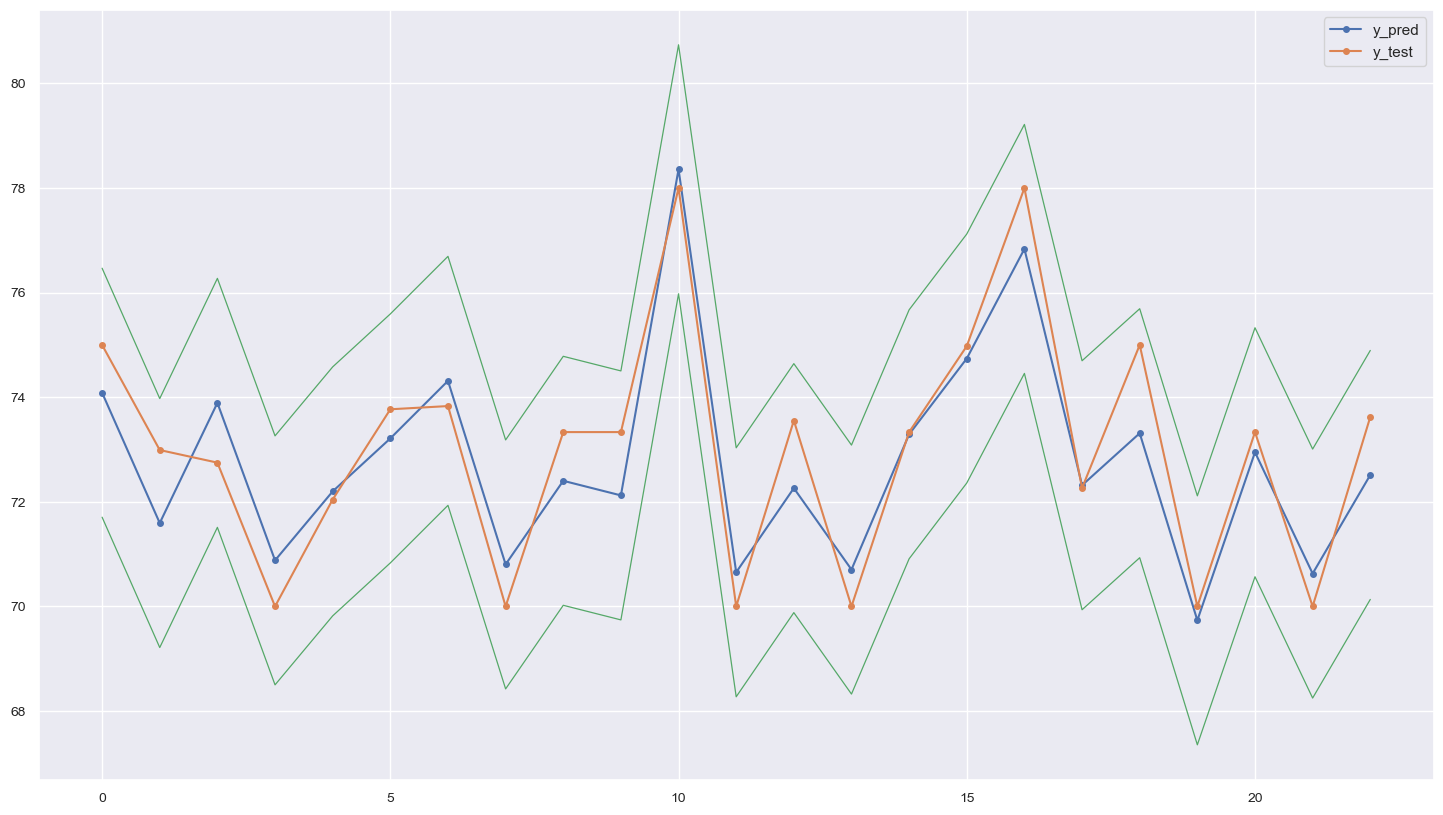

In [228]:
plt.figure(figsize=(18, 10))
plt.plot(y_pred, label='y_pred', marker='o', markersize=4)
plt.plot(y_test, label='y_test', marker='o', markersize=4)
plt.plot(lower, linewidth = 0.9, color='g')
plt.plot(upper, linewidth = 0.9, color='g')
plt.legend()
plt.grid(True)
plt.show()

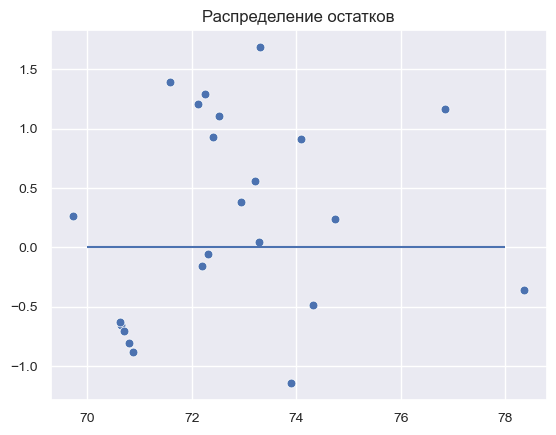

In [229]:
sns.scatterplot(x = y_pred, y = y_test - y_pred, s = 40)
plt.hlines(y = 0, xmin = 70, xmax = 78)
plt.title('Распределение остатков')
plt.show()

Дополнение. Сравнение метрик различных регрессоров с использованием LazyRegressor

In [230]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_std, X_test_std, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 22.61it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               0.82       0.89  0.74        0.02
TransformedTargetRegressor                   0.75       0.85  0.87        0.01
LinearRegression                             0.75       0.85  0.87        0.01
Lars                                         0.75       0.85  0.87        0.01
SGDRegressor                                 0.75       0.85  0.88        0.01
Ridge                                        0.75       0.85  0.88        0.01
PoissonRegressor                             0.75       0.85  0.88        0.01
RandomForestRegressor                        0.71       0.83  0.94        0.14
RidgeCV                                      0.69       0.82  0.98        0.01
OrthogonalMatchingPursuitCV                  0.67       0.81  1.01        0.01
ExtraTreesRegressor                          0.66   

In [231]:
br = BaggingRegressor()

br_parameters = {'n_estimators':range(20, 100, 10), 
                 'random_state':[1, 7, 42, 100]
}
model_br = GridSearchCV(estimator=br,
                   param_grid=br_parameters,
                   scoring='r2', # 'neg_mean_absolute_error'
                   n_jobs=-1,
                   cv=10)
model_br.fit(X_train_std, y_train)

y_br_pred = model_br.predict(X_test_std)
y_br_pred_train = model_br.predict(X_train_std)

rmse_br_train = np.sqrt(mean_squared_error(y_train, y_br_pred_train)).round(3)
rmse_br_test = np.sqrt(mean_squared_error(y_test, y_br_pred)).round(3)
mae_br_train = mean_absolute_error(y_train, y_br_pred_train).round(3)
mae_br_test = mean_absolute_error(y_test, y_br_pred).round(3)
r2_br_train = r2_score(y_train, y_br_pred_train).round(3)
r2_br_test = r2_score(y_test, y_br_pred).round(3)
metrics['BaggingRegressor'] = (rmse_br_train, rmse_br_test, mae_br_train, mae_br_test, r2_br_train, r2_br_test)

print(f'RMSE train: {rmse_br_train}')
print(f'RMSE test:  {rmse_br_test}')
print()
print(f'MAE train:  {mae_br_train}')
print(f'MAE test:   {mae_br_test}')
print()
print(f'R2 train:   {r2_br_train}')
print(f'R2 test:    {r2_br_test}')
model_br.best_params_

RMSE train: 0.953
RMSE test:  0.988

MAE train:  0.758
MAE test:   0.831

R2 train:   0.886
R2 test:    0.813


{'n_estimators': 80, 'random_state': 7}